In [9]:
from skimage import io
from skimage.color import rgb2gray

In [6]:
img = io.imread("./data/108_2.jpg")

In [7]:
from matplotlib import pyplot as plt

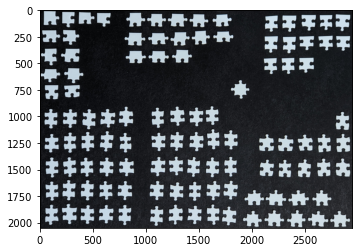

In [8]:
plt.imshow(img)

In [11]:
image_gray = rgb2gray(img)

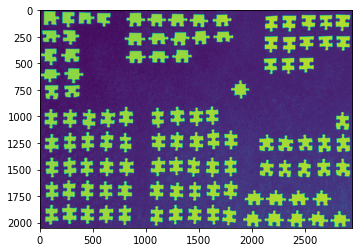

In [13]:
plt.imshow(image_gray)

In [14]:
from skimage.feature import blob_dog, blob_log, blob_doh

In [45]:
blobs_log =  blob_doh(image_gray, max_sigma=200, min_sigma=80, threshold=.01, overlap=.5)

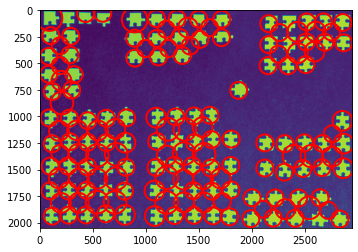

In [46]:
fig, axes = plt.subplots(1, 1)
plt.imshow(image_gray)
for idx, (y, x, r) in enumerate(blobs_log):
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    axes.add_patch(c)
plt.show()

/usr/local/var/pyenv/versions/3.8.0/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


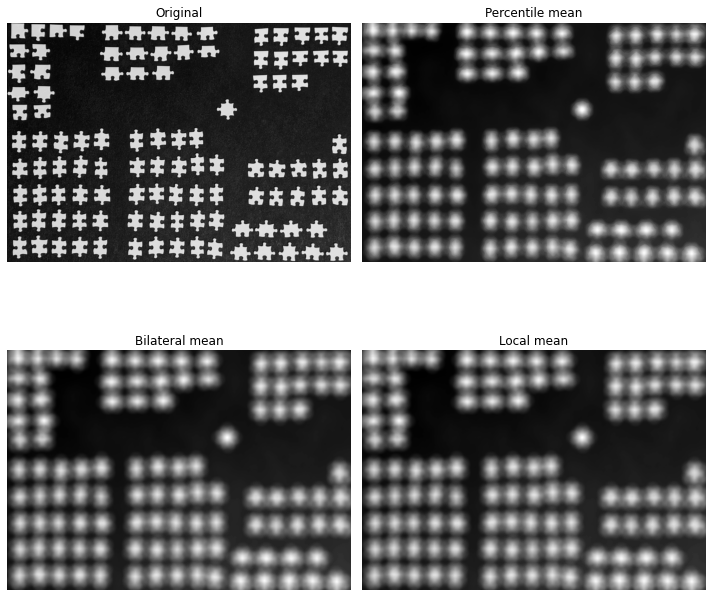

In [55]:

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank


image = image_gray
selem = disk(60)

percentile_result = rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)
bilateral_result = rank.mean_bilateral(image, selem=selem, s0=500, s1=500)
normal_result = rank.mean(image, selem=selem)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()

In [56]:
percentile_result.shape

(2050, 2943)

In [57]:
from skimage.exposure import rescale_intensity


In [58]:
image_rescale = rescale_intensity(normal_result, in_range=(50, 200))

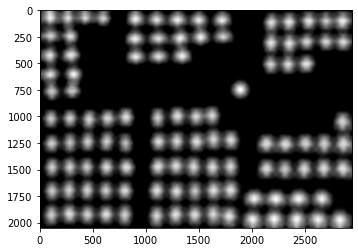

In [59]:
plt.imshow(image_rescale,  cmap=plt.cm.gray)

In [88]:
from scipy import ndimage as ndi
image_max = ndi.maximum_filter(image_rescale, size=50, mode='constant')

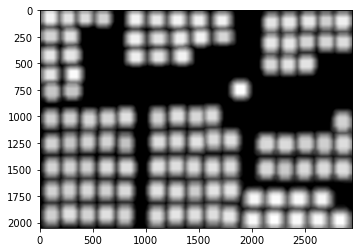

In [89]:
plt.imshow(image_max, cmap=plt.cm.gray)

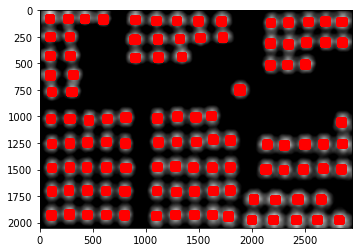

In [91]:
from skimage.feature import peak_local_max
coordinates = peak_local_max(image_max, min_distance=50)


fig, axes = plt.subplots(1, 1)
plt.imshow(image_rescale, cmap=plt.cm.gray)
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

In [73]:
coordinates.shape

(329117, 2)

In [93]:
mask = peak_local_max(image_max, min_distance=50 ,indices=False)


In [94]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [92]:
from scipy.ndimage.measurements import label

In [96]:
label_map, num_label = label(mask)

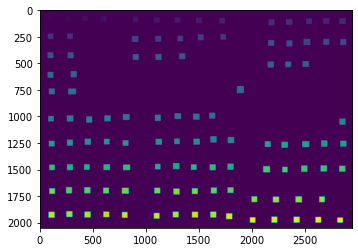

In [97]:
plt.imshow(label_map)

In [98]:
from scipy.ndimage.measurements import center_of_mass

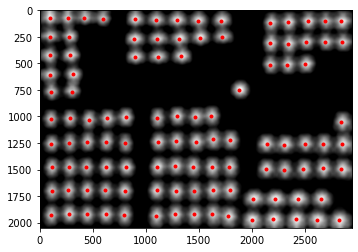

In [102]:
plt.imshow(image_rescale, cmap=plt.cm.gray)

for i in range(num_label):
    label = i + 1 
    x, y = center_of_mass(label_map == label)
    plt.plot(int(y), int(x), 'r.')

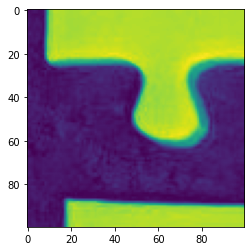

In [104]:
plt.imshow(image_gray[100:200, 200:300])

<ipython-input-110-bd38343fdcbc>:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax[i].imshow(image_gray[x - half_len: x + half_len, y- half_len:y+ half_len], cmap=plt.cm.gray)
<ipython-input-110-bd38343fdcbc>:8: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax[i].imshow(image_gray[x - half_len: x + half_len, y- half_len:y+ half_len], cmap=plt.cm.gray)


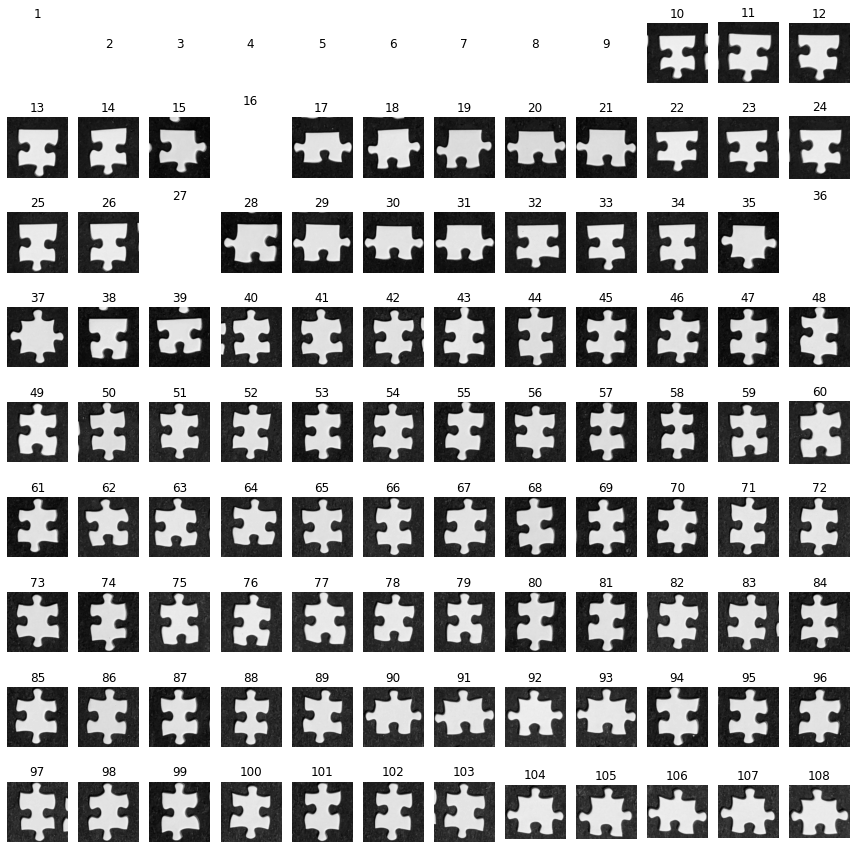

In [110]:
fig, axes = plt.subplots(9, 12, figsize=(12, 12))
ax = axes.ravel()
half_len = 100
for i in range(num_label):
    label = i + 1 
    _x, _y = center_of_mass(label_map == label)
    y, x = int(_y), int(_x)
    ax[i].imshow(image_gray[x - half_len: x + half_len, y- half_len:y+ half_len], cmap=plt.cm.gray)
    ax[i].set_title(str(label))
    ax[i].axis('off')

plt.tight_layout()
plt.show()

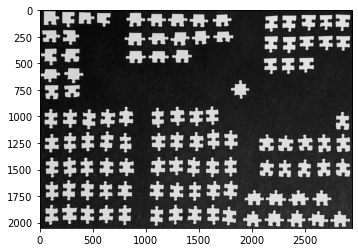

In [113]:
plt.imshow(image_gray, cmap=plt.cm.gray)

In [116]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(image_gray)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

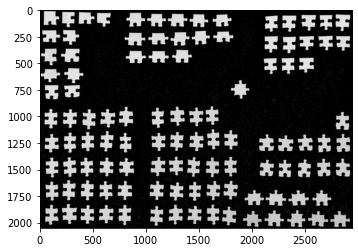

In [120]:
img_bg_clear = image - dilated
plt.imshow(img_bg_clear, cmap=plt.cm.gray)

In [134]:
img_bg_clear

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
image_max = ndi.maximum_filter(img_bg_clear, size=10, mode='constant')

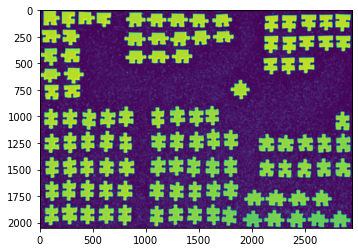

In [136]:
plt.imshow(image_max)

In [139]:
peak_mask = peak_local_max(image_max, min_distance=100 ,indices=False)


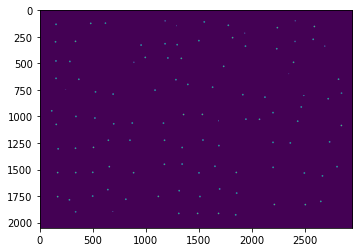

In [140]:
plt.imshow(peak_mask)

In [170]:
img_smooth = gaussian_filter(image_gray, 2)
img_binary = img_as_float(img_smooth  > 0.5)


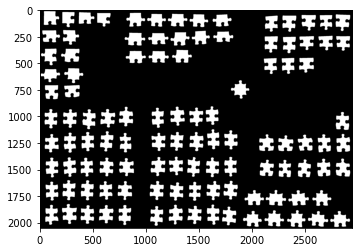

In [171]:
plt.imshow(img_binary, cmap=plt.cm.gray)

In [172]:
img_binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [173]:
peak_mask = peak_local_max(img_binary, min_distance=20 ,indices=False)

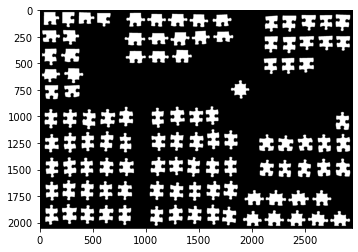

In [174]:
plt.imshow(peak_mask, cmap=plt.cm.gray)

In [183]:
from skimage.measure import label, regionprops
label_image, label_num = label(peak_mask, return_num =True)

In [184]:
label_num

108

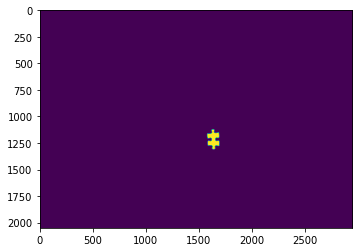

In [186]:
plt.imshow(label_image == 50)

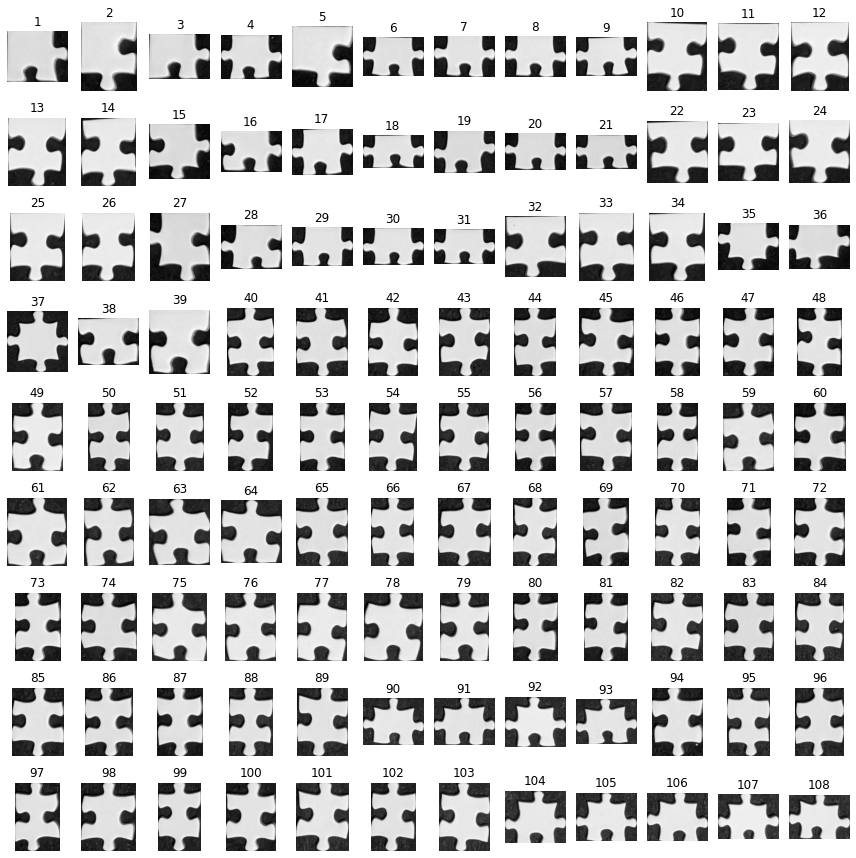

In [192]:
fig, axes = plt.subplots(9, 12, figsize=(12, 12))
ax = axes.ravel()
for i, region in enumerate(regionprops(label_image)):
    label = i + 1
    min_row, min_col, max_row, max_col = region.bbox
    ax[i].imshow(image_gray[min_row: max_row, min_col:max_col], cmap=plt.cm.gray)
    ax[i].set_title(str(label))
    ax[i].axis('off')

plt.tight_layout()
plt.show()